Matrix profile has been shown to be a powerful and efficient tool to find anomalies and motifs in individual time series. But how about when you have multiple time series and you'd like to identify global anomalies and motifs? 

In this brief tutorial, I will demonstrate an approach to finding global anomalies and motifs in the multiple time series context using concatenation. 

This approach makes a few assumptions:
* You care about both within and between time series comparisons
* You want to compare all sub sequences across time series, regardless of when they occurred in the respective time series

# The Approach

I will demonstrate this approaching using the [realTweets](https://github.com/numenta/NAB/tree/master/data/realTweets) dataset from [The Numenta Anomaly Benchmark (NAB)](https://github.com/numenta/NAB) repo. This dataset provides Twitter mention volume across time from 10 companies in 2015.

In [15]:
import numpy as np
import pandas as pd 
import matrixprofile as mp
from sklearn import preprocessing
import matplotlib.pyplot as plt

repo_root = 'https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_'
companies = ['AAPL', 'AMZN', 'CRM', 'CVS', 'FB', 'GOOG', 'IBM', 'KO', 'PFE', 'UPS']

# reading data for all companies in into a list of pandas dataframes
twitter_stock_data = [pd.read_csv(repo_root + company + ".csv", parse_dates = ['timestamp']) for company in companies]

# normalize to allow for comparison across the individual time series
min_max_scaler = preprocessing.MinMaxScaler()

twitter_stock_data_values = [min_max_scaler.fit_transform(data[['value']]) for data in twitter_stock_data]

In [16]:
#setting window size
window_size = 100

#creating inf dataframe, size of window
infs = np.repeat([float(0)], window_size, axis = 0).reshape(-1, 1)

#adding inf buffer to each time series
twitter_stock_data_values = [np.concatenate([stock_ts, infs]) for stock_ts in twitter_stock_data_values]

all_stock_data = np.concatenate(twitter_stock_data_values)

We need a new step here to add noise to deal with the borders between the each series.

In [17]:
all_stock_data_noise = mp.preprocess.add_noise_to_series(np.concatenate(all_stock_data))

/Users/kevinkent/opt/anaconda3/lib/python3.7/site-packages/matrixprofile/visualize.py:375: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


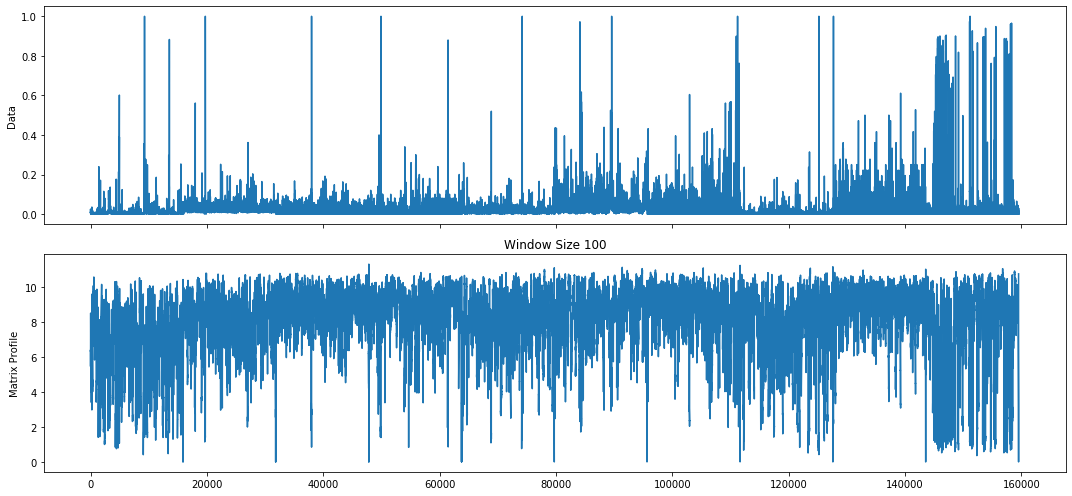

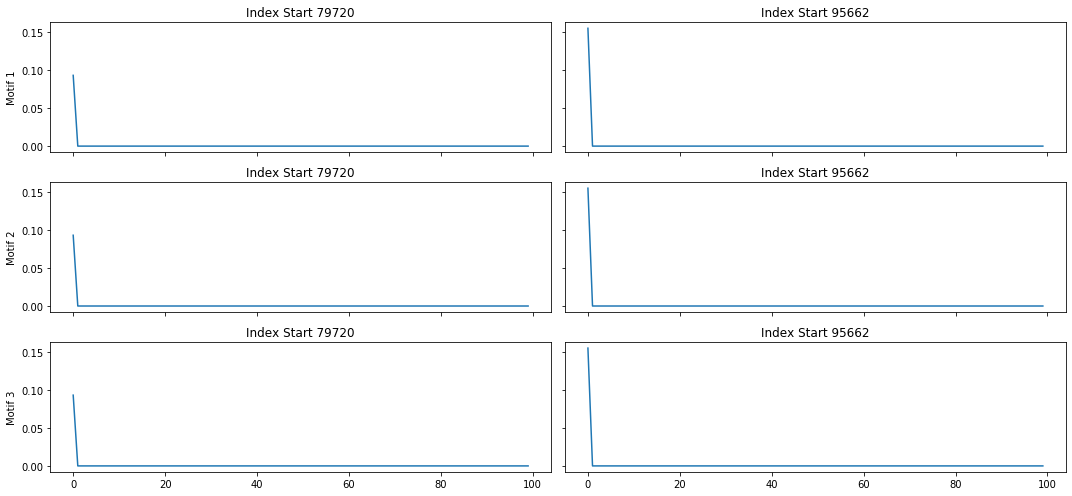

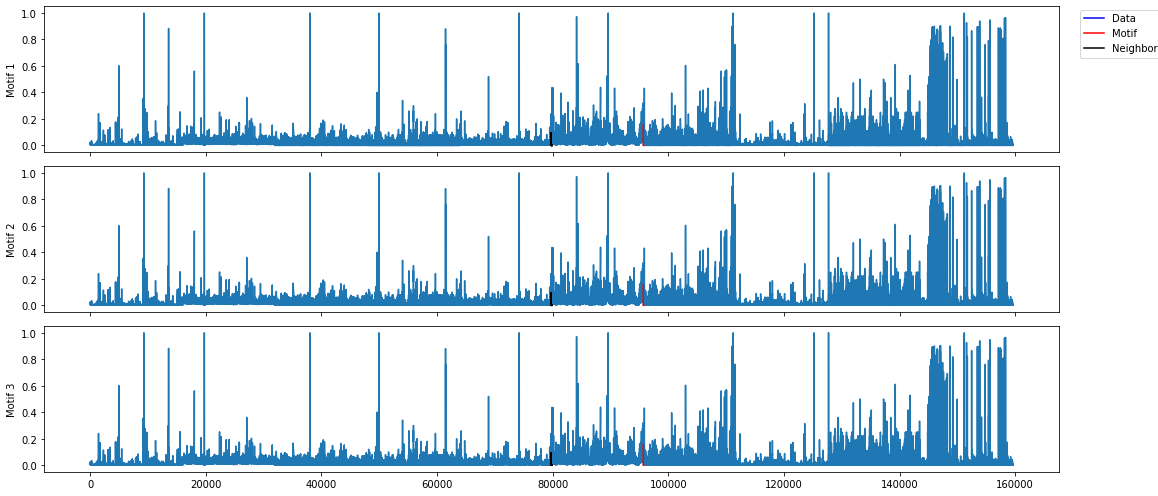

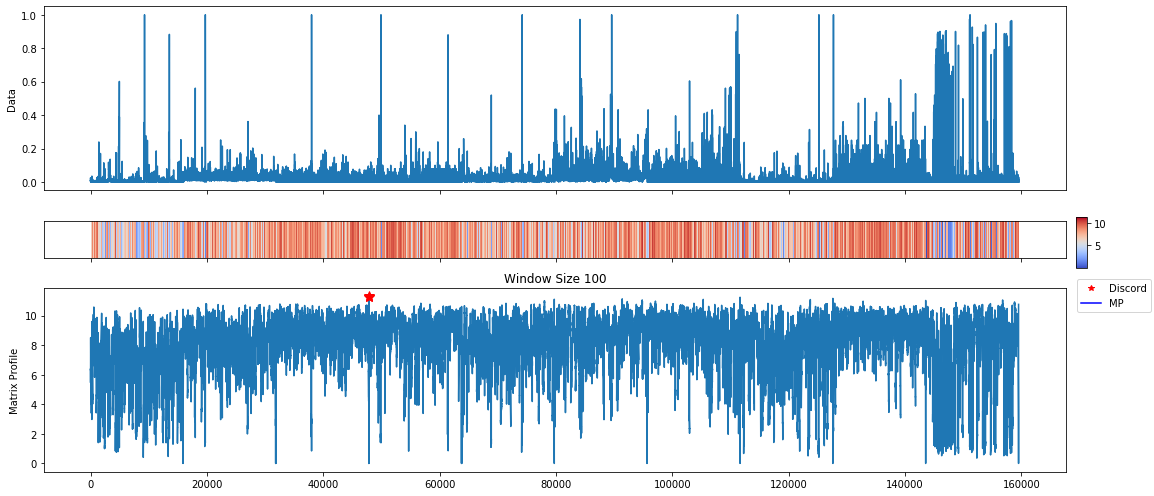

In [23]:
#Calculate matrix profile
mprofile = mp.analyze(all_stock_data_noise, windows = window_size)

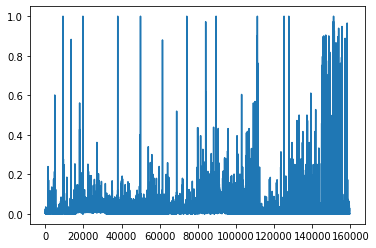

In [30]:
plt.plot(all_stock_data)

Lastly, let's identify the companies with the global discords

In [37]:
company_index = np.repeat(companies, [len(data) + window_size for data in twitter_stock_data])

[company_index[discord] for discord in mprofile[0]['discords']]

['CRM', 'CRM', 'CRM']